In [4]:
import statistics as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- A Probability Distribution finds the probability of different outcomes 
- A coin flip has a probability distribution of .5 
- A die roll has a probability distribution of 1/6 or .167 
- When you sum all probabilities you get a value of 1.

In [5]:
dice_list = [1, 2, 4, 4, 4, 5, 5, 5, 6]
print(f"Sum: {sum(dice_list)}")
print(f"Mean: {stats.mean(dice_list)}")
print(f"Standard Deviation: {stats.stdev(dice_list)}")

Sum: 36
Mean: 4
Standard Deviation: 1.5811388300841898


## Normal Distribution

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

In [6]:
def visualize_distribution(data_list, data_name):
    # Set random seed for reproducibility
    np.random.seed(0)
    # Calculate the mean and standard deviation
    calculated_mean = stats.mean(data_list)
    calculated_std_dev = stats.stdev(data_list)

    plt.figure(figsize=(6,4))
    # Create a histogram with KDE
    sns.histplot(data_list, bins=30, kde=True, color='blue', stat='density', alpha=0.5)

    # Plot the normal distribution curve
    x = np.linspace(calculated_mean - 4*calculated_std_dev, calculated_mean + 4*calculated_std_dev, 1000)
    y_pdf_normal_distribution = (1 / (calculated_std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - calculated_mean) / calculated_std_dev) ** 2)

    plt.plot(x, y_pdf_normal_distribution, color='red', label='Distribution', linewidth=2)
    plt.title(f'{data_name} Distribution Plot')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid()
    plt.show()

- A Normal Distribution is when data forms a bell curve. Also 1 Standard Deviation is representative of 68% of the data. 2 standard deviations cover 95% and 3 covers 99.7%.
- To have a Normal Distribution the Mean = Median and Mode
- Also 50% of values are both less than and greater that the mean.

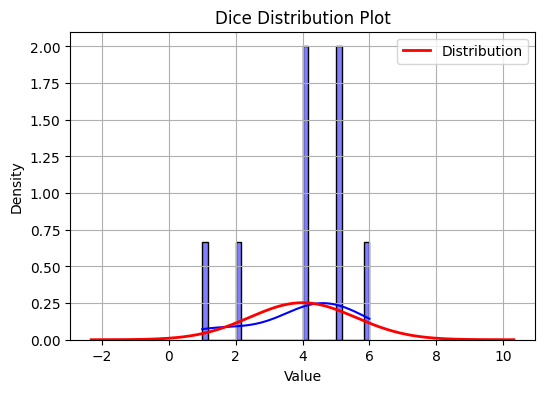

In [7]:
visualize_distribution(dice_list, "Dice")

## Standard Normal Distribution
$$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}
$$
- A Standard Normal Distribution has a mean of zero and a standard deviation of 1. If we calculate the mean we see it is 4. If we calculate the standard deviation that comes to 1.58. 
- We can turn this into a Standard Normal Distribution by subtracting the mean from each value and divide by the standard deviation. If we do that we get the chart here.

In [8]:
def normalize_list(dice_list):
    # Calculate the mean and standard deviation
    mean = stats.mean(dice_list)
    sd_list = stats.stdev(dice_list)
    # Normalize the data
    norm_data = [(x_i-mean)/sd_list for x_i in dice_list]
    return norm_data


In [9]:
normalize_dice_list = normalize_list(dice_list)
print(f"Normalized List: {normalize_dice_list}")
print(f"Normal Mean: {stats.mean(normalize_dice_list)}")
print(f"Normal Standard Deviation: {stats.stdev(normalize_dice_list)}")

Normalized List: [-1.8973665961010275, -1.2649110640673518, 0.0, 0.0, 0.0, 0.6324555320336759, 0.6324555320336759, 0.6324555320336759, 1.2649110640673518]
Normal Mean: 1.2335811384723961e-17
Normal Standard Deviation: 1.0


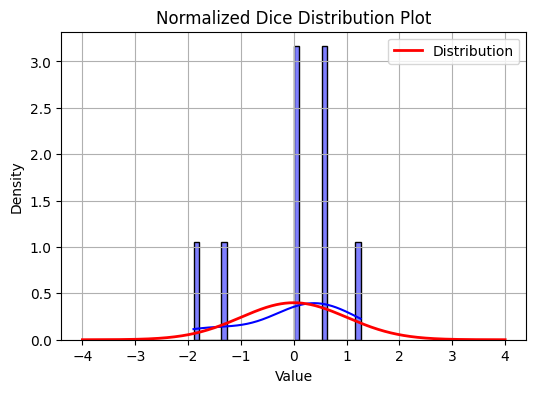

In [10]:
visualize_distribution(normalize_dice_list, "Normalized Dice")

## Central Limit Theorem
- The CLT states that the sampling distribution of the sample mean approaches a **normal distribution** as the sample size increases, regardless of the population distribution, given that the sample consists of **independent** and identically distributed random variables with finite mean and variance.
- The Central Limit Theorem states that the more samples you take the closer you get to the mean. Also the distribution will
 approximate the Normal Distribution 
- As you can see as the sample size increases the standard deviation decreases.

### Sample Error or Standard Error
- The Sample Error measures the accuracy of an estimate. To find it divide standard deviation by the square root of the samplesize.
- the sample size increases the Standard Error decreases.
$$ \frac{\sigma}{\sqrt{n}} $$

## 

In [11]:
def sample_error(data_list):
    sd_list = stats.stdev(data_list)
    samp_error = sd_list / (np.sqrt(len(data_list)))
    return samp_error

In [12]:
print(f"Standard Error : {sample_error(normalize_dice_list)}")

Standard Error : 0.3333333333333333


### Z Score

- The Z Score gives us the value in standard deviations for the percentile we want
- For example if we want 95% of the data, it tells us how many standard deviations are required. 
- The formula asks for the length from the mean to x and divides by the standard deviation.

This will make more sense with an example. Here is a Z Table.
- If we know our mean is 40.8, the standard deviation is 3.5 and we want the area to the left of the point 48 we perform our
calculation to get 2.06. 
- We then find 2.0 on the left of the Z Table * and .06 on the top. 
- This tells us that the area under the curve makes up .98030 of the total.

### Confidence Interval

In [13]:
pos_z_code_list = [['.50000', '.50399', '.50798', '.51197', '.51595', '.51994', '.52392', '.52790', '.53188', '.53586'], 
['.53983', '.54380', '.54776', '.55172', '.55567', '.55962', '.56356', '.56749', '.57142', '.57535'], 
['.57926', '.58317', '.58706', '.59095', '.59483', '.59871', '.60257', '.60642', '.61026', '.61409'], 
['.61791', '.62172', '.62552', '.62930', '.63307', '.63683', '.64058', '.64431', '.64803', '.65173'], 
['.65542', '.65910', '.66276', '.66640', '.67003', '.67364', '.67724', '.68082', '.68439', '.68793'], 
['.69146', '.69497', '.69847', '.70194', '.70540', '.70884', '.71226', '.71566', '.71904', '.72240'], 
['.72575', '.72907', '.73237', '.73565', '.73891', '.74215', '.74537', '.74857', '.75175', '.75490'], 
['.75804', '.76115', '.76424', '.76730', '.77035', '.77337', '.77637', '.77935', '.78230', '.78524'], 
['.78814', '.79103', '.79389', '.79673', '.79955', '.80234', '.80511', '.80785', '.81057', '.81327'], 
['.81594', '.81859', '.82121', '.82381', '.82639', '.82894', '.83147', '.83398', '.83646', '.83891'], 
['.84134', '.84375', '.84614', '.84849', '.85083', '.85314', '.85543', '.85769', '.85993', '.86214'], 
['.86433', '.86650', '.86864', '.87076', '.87286', '.87493', '.87698', '.87900', '.88100', '.88298'], 
['.88493', '.88686', '.88877', '.89065', '.89251', '.89435', '.89617', '.89796', '.89973', '.90147'], 
['.90320', '.90490', '.90658', '.90824', '.90988', '.91149', '.91309', '.91466', '.91621', '.91774'], 
['.91924', '.92073', '.92220', '.92364', '.92507', '.92647', '.92785', '.92922', '.93056', '.93189'], 
['.93319', '.93448', '.93574', '.93699', '.93822', '.93943', '.94062', '.94179', '.94295', '.94408'], 
['.94520', '.94630', '.94738', '.94845', '.94950', '.95053', '.95154', '.95254', '.95352', '.95449'], 
['.95543', '.95637', '.95728', '.95818', '.95907', '.95994', '.96080', '.96164', '.96246', '.96327'], 
['.96407', '.96485', '.96562', '.96638', '.96712', '.96784', '.96856', '.96926', '.96995', '.97062'], 
['.97128', '.97193', '.97257', '.97320', '.97381', '.97441', '.97500', '.97558', '.97615', '.97670'], 
['.97725', '.97778', '.97831', '.97882', '.97932', '.97982', '.98030', '.98077', '.98124', '.98169'], 
['.98214', '.98257', '.98300', '.98341', '.98382', '.98422', '.98461', '.98500', '.98537', '.98574'], 
['.98610', '.98645', '.98679', '.98713', '.98745', '.98778', '.98809', '.98870', '.98899', '.98928'], 
['.98956', '.98983', '.99010', '.99036', '.99061', '.99086', '.99111', '.99134', '.99158', '.99180'], 
['.99202', '.99224', '.99245', '.99266', '.99286', '.99305', '.99324', '.99343', '.99361', '.99379'], 
['.99396', '.99413', '.99430', '.99446', '.99461', '.99477', '.99492', '.99506', '.99520', '.99534'], 
['.99547', '.99560', '.99573', '.99585', '.99598', '.99609', '.99621', '.99632', '.99643', '.99653'], 
['.99664', '.99674', '.99683', '.99693', '.99702', '.99711', '.99720', '.99728', '.99736', '.99744'], 
['.99752', '.99760', '.99767', '.99774', '.99781', '.99788', '.99795', '.99801', '.99807', '.99813'], 
['.99819', '.99825', '.99831', '.99836', '.99841', '.99846', '.99851', '.99856', '.99861', '.99865'], 
['.99869', '.99874', '.99878', '.99882', '.99886', '.99889', '.99893', '.99896', '.99900', '.99903'], 
['.99906', '.99910', '.99913', '.99916', '.99918', '.99921', '.99924', '.99926', '.99929', '.99931'], 
['.99934', '.99936', '.99938', '.99940', '.99942', '.99944', '.99946', '.99948', '.99950', '.99952'], 
['.99953', '.99955', '.99957', '.99958', '.99960', '.99961', '.99962', '.99964', '.99965', '.99966'], 
['.99968', '.99969', '.99970', '.99971', '.99972', '.99973', '.99974', '.99975', '.99976', '.99977'], 
['.99978', '.99978', '.99979', '.99980', '.99981', '.99981', '.99982', '.99983', '.99983', '.99984'], 
['.99985', '.99985', '.99986', '.99986', '.99987', '.99987', '.99988', '.99988', '.99989', '.99989'], 
['.99990', '.99990', '.99990', '.99991', '.99991', '.99992', '.99992', '.99992', '.99992', '.99993'], 
['.99993', '.99993', '.99994', '.99994', '.99994', '.99994', '.99995', '.99995', '.99995', '.99995'], 
['.99995', '.99996', '.99996', '.99996', '.99996', '.99996', '.99996', '.99997', '.99997']]


In [14]:
import re
def get_z_code(z_code_area):
    # Get index for first closest matching value in Z Table
    # Define what I'm looking for
    # Trim the 0 from the area because it isn't used in the
    # list of table values
    z_code_area = ("%.3f" % z_code_area).lstrip('0')
    # Create the Regex with . 3 provided values and any last 2 digits
    regex = "\\" + z_code_area + "\d{2}"
    # Iterate the multidimensional list
    for i in range(0, len(pos_z_code_list) - 1):
        for j in range(0, len(pos_z_code_list[0])):
            # If I find a match
            if re.search(regex, pos_z_code_list[i][j]):
                # Combine column and row values into Z Code
                z_code = float(i * .1 + j * .01)
                return z_code

In [15]:
# Formula (x,y) = x̄ ± Z(α/2) * σ/√n
# x̄ : Sample Mean
# α : Alpha (1 - Confidence)
# σ : Standard Deviation
# n : Sample Size
def get_confidence_interval(sample_mean, confidence, sd, sample_size):
    alpha_val = (1 - confidence)
    critical_probability = 1 - alpha_val / 2
    z_code = get_z_code(critical_probability)
    print("Alpha {:.3f}".format(alpha_val))
    print("Critical Probability {:.3f}".format(critical_probability))
    print("Z Code {:.3f}".format(z_code))
    print("Margin of Error {:.3f}".format((z_code * (sd / np.sqrt(sample_size)))))
    x = sample_mean - (z_code * (sd / np.sqrt(sample_size)))
    y = sample_mean + (z_code * (sd / np.sqrt(sample_size)))
    print(f"Confidence Interval")
    print("Low : {:.2f}".format(x))
    print("High : {:.2f}".format(y))

In [16]:
# Calculate the Houston Rockets salary confidence interval
salary_list = [38178000, 37800000, 14057730, 11301219, 8349039, 3540000,
               2564753, 2564753, 2174318, 2028594, 1845301, 903111,
               8111447, 695526, 568422]
 
# # Formula (x,y) = x̄ ± Z(α/2) * σ/√n
# # x̄ : Sample Mean
# # α : Alpha (1 - Confidence)
# # σ : Standard Deviation
# # n : Sample Size
# get_confidence_interval(sample_mean, alpha, sd, sample_size)
sample_mean = stats.mean(salary_list)
print(f"Mean {sample_mean}")
confidence = .95
standard_deviation = stats.stdev(salary_list)
print(f"Standard Deviation {standard_deviation}")
 
get_confidence_interval(sample_mean, confidence, standard_deviation, 15)

Mean 8978814.2
Standard Deviation 12471425.73833145
Alpha 0.050
Critical Probability 0.975
Z Code 1.960
Margin of Error 6311412.227
Confidence Interval
Low : 2667401.97
High : 15290226.43


### Student's T Distribution

PDF:
$f(t) = \frac{\Gamma\left(\frac{v+1}{2} \right)}{\sqrt{v\pi} \, \Gamma \left(\frac{v}{2} \right)} \left(1 + \frac{t^2}{v} \right)^{-\frac{v+1}{2}}$

In [17]:
t_table_confidence = ['0.1000', '0.0500', '0.0250', '0.0100', '0.0050', '0.0010', '0.0005']

t_table_list = [[3.078, 6.314, 12.076, 31.821, 63.657, 318.310, 636.620],
[1.886, 2.920, 4.303, 6.965, 9.925, 22.326, 31.598],
[1.638, 2.353, 3.182, 4.541, 5.841, 10.213, 12.924],
[1.533, 2.132, 2.776, 3.747, 4.604, 7.173, 8.610],
[1.476, 2.015, 2.571, 3.365, 4.032, 5.893, 6.869],
[1.440, 1.943, 2.447, 3.143, 3.707, 5.208, 5.959],
[1.415, 1.895, 2.365, 2.998, 3.499, 4.785, 5.408],
[1.397, 1.860, 2.306, 2.896, 3.355, 4.501, 5.041],
[1.383, 1.833, 2.262, 2.821, 3.250, 4.297, 4.781],
[1.372, 1.812, 2.228, 2.764, 3.169, 4.144, 4.587],
[1.363, 1.796, 2.201, 2.718, 3.106, 4.025, 4.437],
[1.356, 1.782, 2.179, 2.681, 3.055, 3.930, 4.318],
[1.350, 1.771, 2.160, 2.650, 3.012, 3.852, 4.221],
[1.345, 1.761, 2.145, 2.624, 2.977, 3.787, 4.140],
[1.341, 1.753, 2.131, 2.602, 2.947, 3.733, 4.073],
[1.337, 1.746, 2.120, 2.583, 2.921, 3.686, 4.015],
[1.333, 1.740, 2.110, 2.567, 2.898, 3.646, 3.965],
[1.330, 1.734, 2.101, 2.552, 2.878, 3.610, 3.922],
[1.328, 1.729, 2.093, 2.539, 2.861, 3.579, 3.883],
[1.325, 1.725, 2.086, 2.528, 2.845, 3.552, 3.850],
[1.323, 1.721, 2.080, 2.518, 2.831, 3.527, 3.819],
[1.321, 1.717, 2.074, 2.508, 2.819, 3.505, 3.792],
[1.319, 1.714, 2.069, 2.500, 2.807, 3.485, 3.767],
[1.318, 1.711, 2.064, 2.492, 2.797, 3.467, 3.745],
[1.316, 1.708, 2.060, 2.485, 2.787, 3.450, 3.725],
[1.315, 1.706, 2.056, 2.479, 2.779, 3.425, 3.707],
[1.314, 1.703, 2.052, 2.473, 2.771, 3.421, 3.690],
[1.313, 1.701, 2.048, 2.467, 2.763, 3.408, 3.674],
[1.311, 1.699, 2.045, 2.462, 2.756, 3.396, 3.659],
[1.310, 1.697, 2.042, 2.457, 2.750, 3.385, 3.646],
[1.303, 1.684, 2.021, 2.423, 2.704, 3.307, 3.551],
[1.296, 1.671, 2.000, 2.390, 2.660, 3.232, 3.460],
[1.289, 1.658, 1.980, 2.358, 2.617, 3.160, 3.373],
[1.282, 1.645, 1.960, 2.326, 2.576, 3.090, 3.291]]


In [18]:
def get_t_confidence_interval(confidence, args):
    # Get alpha for T Table with 4 decimals
    half_alpha = (1 - confidence) / 2
    half_alpha = ("%.4f" % half_alpha)

    # Get the T Value, sample mean and standard
    # deviation based on the data
    if half_alpha in t_table_confidence:
        alpha_index = t_table_confidence.index(half_alpha)
        # Subtract 2 instead of 1 because list is 0 based
        degree_freedom = len(args) - 2
        if 1 <= degree_freedom <= 30:
            t_value = t_table_list[degree_freedom][alpha_index]
        elif 31 <= degree_freedom <= 60:
            t_value = t_table_list[31][alpha_index]
        elif 61 <= degree_freedom <= 120:
            t_value = t_table_list[32][alpha_index]
        else:
            t_value = t_table_list[33][alpha_index]
        sample_mean = stats.mean(args)
        sd = stats.stdev(args)
        print("T Distribution")
        print("Sample Mean : {:.4f}".format(sample_mean))
        print("Standard Deviation : {:.4f}".format(sd))
        print("T Value : {:.3f}".format(t_value))

        # Return high and low distribution
        low_val = sample_mean - (t_value * (sd / np.sqrt(degree_freedom)))
        high_val = sample_mean + (t_value * (sd / np.sqrt(degree_freedom)))
        print("Low : {:.2f}".format(low_val))
        print("High : {:.2f}".format(high_val))


**Example**: Let’s say a manufacturer is promising brake pads will last
for 65,000 km with a .95 confidence level. 

In [19]:
# Generate Random List between 58000 and 68000
# break_pad_kms = [random.randint(58000, 68000) for i in range(30)]
break_pad_kms = [58500, 58700, 62800, 57220, 62750, 59370, 57720, 60920, 61910, 59260, 63550, 60520, 58710, 57340, 60660, 57750, 60430, 60050, 62970, 58870]
get_t_confidence_interval(.95, break_pad_kms)

T Distribution
Sample Mean : 60000.0000
Standard Deviation : 1988.1782
T Value : 2.093
Low : 59019.18
High : 60980.82


In [20]:
# When used with previous formula you can see results are similar
get_confidence_interval(60000, .95, 1988.1782, 20)

Alpha 0.050
Critical Probability 0.975
Z Code 1.960
Margin of Error 871.358
Confidence Interval
Low : 59128.64
High : 60871.36


## Hypothesis Testing